# Time Series Analysis
## Seasonal ARIMA model

In [1]:
import warnings

import numpy as np
import pandas as pd
import statsmodels.api as sm

from quantfin.models import arima

warnings.filterwarnings('ignore')

In [2]:
# Import data
path = 'quantfin/data/^GSPC.csv'
series = pd.read_csv(path, index_col=['Date'], skiprows=range(1, 2000), parse_dates=['Date'])
data = series['Adj Close']

Non-seasonal integral d = 1
Season length s = 0


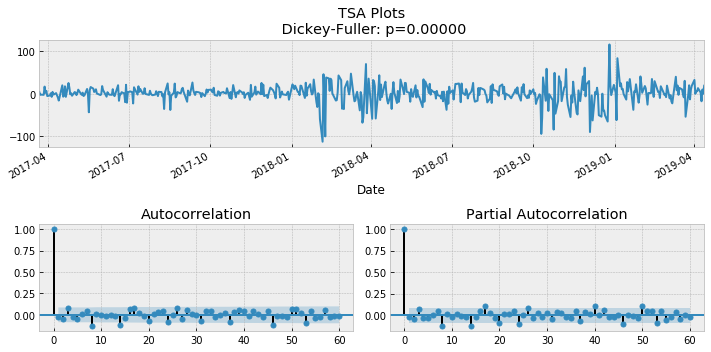

In [3]:
# Remove trend and seasonality, find optimal (d, ds, s)
d, ds, s = arima.seasonality(data, optimize=True, graph=True)

# Out-of-sample num of periods to forecast
n_predict = 2

# Initialize ranges of SARIMA parameters
p = range(5)
q = range(5)

if ds == 0:
    ps, qs = [0], [0]
else:
    ps = range(3)
    qs = range(3)


Number of combinations = 25

(p, q, P, Q) |     AIC      |  Iteration  
(0, 0, 0, 0) |   4705.73    |     1/25    
(1, 2, 0, 0) |   4705.03    |     8/25    
(2, 2, 0, 0) |   4702.70    |    13/25    


Optimized ARIMA(2, 1, 2)x(0, 0, 0, 0)

                           Statespace Model Results                           
Dep. Variable:              Adj Close   No. Observations:                  520
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2346.351
Date:                Thu, 06 Jun 2019   AIC                           4702.701
Time:                        16:30:10   BIC                           4723.961
Sample:                             0   HQIC                          4711.030
                                - 520                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

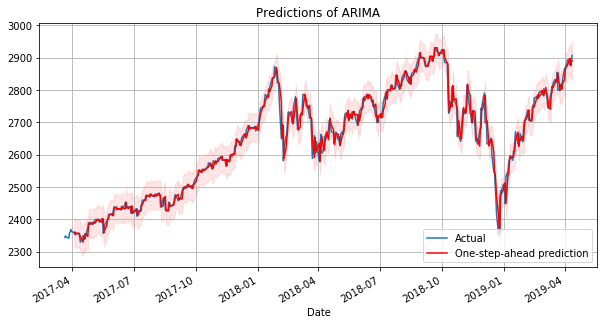

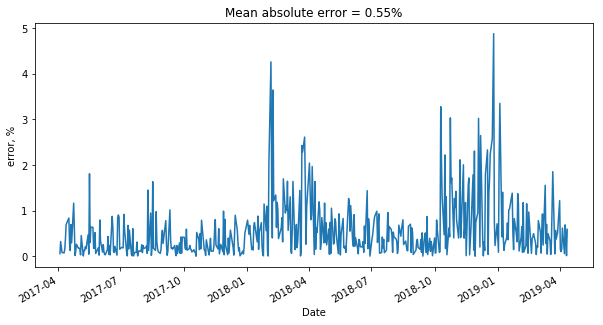

Wall time: 7.57 s


In [4]:
%%time

# Optimize model
p, q, ps, qs = arima.optimize(data, p, d, q, ps, ds, qs, s, display=True)

# Build optimal ARIMA model
model = sm.tsa.statespace.SARIMAX(data, order=(p, d, q), seasonal_order=(ps, ds, qs, s))
result = model.filter(model.fit(disp=False).params)
print(result.summary())

# Make one-step-ahead prediction
# Plot predictions against actual data
prediction = arima.predict(data, result, n_predict, graph=True)

# Estimate prediction error
mean_abs_error = arima.error(data, prediction, graph=True)

Reference: https://www.statsmodels.org/dev/index.html